# Evaluation

In [1]:
import json
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
from sklearn import metrics
import matplotlib.pyplot as plt

## Summary Length

In [2]:
directory = "./evaluation/summary/gpt-4-0125-preview/"

evalDF = pd.DataFrame(columns=["jira", "ticketId", "evolution", "ticket_uri", "output_uri", "violation_actual", "violation_predicted", "summary_old", "length_old", "summary_new", "length_new", "correction_in_range"])

actual = np.array([])
predicted = np.array([])

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    outputUri = directory + filename

    if not filename.endswith(".json"):
        continue

    with open(outputUri) as f:
        result = json.load(f)
    
    actual = np.append(actual, result["violation_actual"])
    predicted = np.append(predicted, result["output"]["violation_predicted"])

    if (len(result["output"]["summary_new"]) <= 70) & (len(result["output"]["summary_new"]) >= 39):
        in_range = "TRUE"
    else:
        in_range = "FALSE"

    new_row = {
        'jira': result["input_data"]["jira"], 
        'ticketId': result["input_data"]["id"], 
        'evolution': result["input_data"]["evolution"], 
        'ticket_uri': result["input_data"]["ticket_uri"],
        'output_uri': outputUri, 
        'violation_actual': result["violation_actual"], 
        'violation_predicted': result["output"]["violation_predicted"],
        'summary_old': result["output"]["summary_old"],
        'length_old': len(result["output"]["summary_old"]), 
        'summary_new': result["output"]["summary_new"],
        'length_new': len(result["output"]["summary_new"]), 
        'correction_in_range': in_range
        }

    evalDF.loc[len(evalDF)]=new_row

# Save data to csv
evalDF.to_csv(directory + "evaluatedSummarys.csv", index=False)

#### Detection

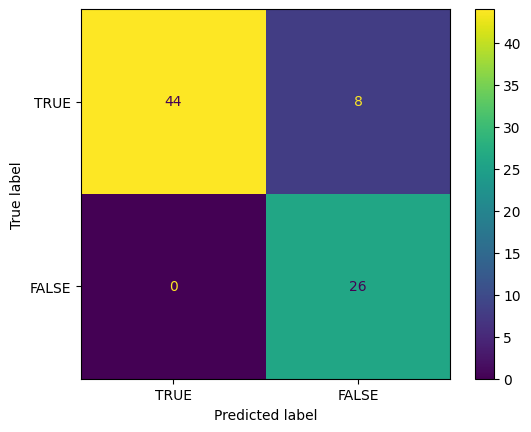

In [3]:
accuracy = metrics.accuracy_score(actual, predicted)
precision = metrics.precision_score(actual, predicted, pos_label="FALSE")
recall = metrics.recall_score(actual, predicted, pos_label="TRUE")
f1 = metrics.f1_score(actual, predicted, pos_label="TRUE")

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["TRUE", "FALSE"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["TRUE", "FALSE"])

cm_display.plot()
plt.show()

In [4]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1: " + str(f1))


Accuracy: 0.8974358974358975
Precision: 0.7647058823529411
Recall: 0.8461538461538461
F1: 0.9166666666666666


#### Correction

In [5]:
successRate = evalDF["correction_in_range"].value_counts(normalize=True)["TRUE"]

In [6]:
print("Success rate: " + str(successRate))

Success rate: 0.9871794871794872


# Update

In [7]:
directory = "./evaluation/update/gpt-4-0125-preview/"

In [8]:
evalDF = pd.DataFrame(columns=["jira", "ticketId", "evolution", "reruns", "ticket_uri", "output_uri", "violation_actual", "violation_predicted", "change_actual", "change_predicted", "all_detected"])

actual = np.array([])
predicted = np.array([])

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    outputUri = directory + filename

    if not filename.endswith(".json"):
        continue

    with open(outputUri) as f:
        result = json.load(f)

    actual = np.append(actual, result["violation_actual"])
    predicted = np.append(predicted, result["output"]["violation_predicted"])

    new_row = {
        'jira': result["input_data"]["jira"], 
        'ticketId': result["input_data"]["id"], 
        'evolution': result["input_data"]["evolution"],
        'reruns': result["reruns"],
        'ticket_uri': result["input_data"]["ticket_uri"],
        'output_uri': outputUri, 
        'violation_actual': result["violation_actual"], 
        'violation_predicted': result["output"]["violation_predicted"],
        'change_actual': result["reason"],
        'change_predicted': result["output"]["fields"],
        'all_detected': None
        }

    evalDF.loc[len(evalDF)]=new_row    

# Save data to csv
evalDF.to_csv(directory + "updateSummarys.csv", index=False)

#### Detection

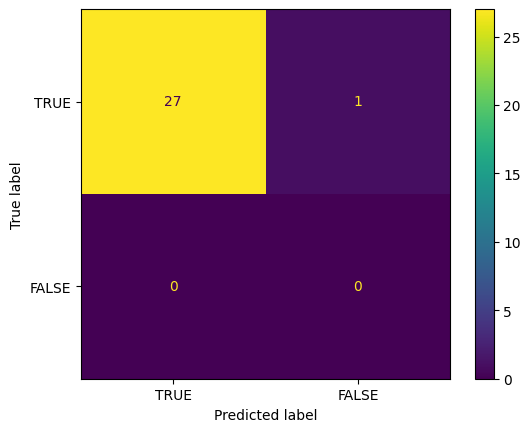

In [11]:
accuracy = metrics.accuracy_score(actual, predicted)

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=["TRUE", "FALSE"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["TRUE", "FALSE"])

cm_display.plot()
plt.show()

In [12]:
print("Accuracy: " + str(accuracy))

Accuracy: 0.9642857142857143
